In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error ,median_absolute_error, max_error, r2_score
from sklearn.inspection import permutation_importance
import datetime as dt

In [8]:
### IMPORTANDO OS DADOS ###

X_test = pd.read_csv('X_test.csv', sep=';')
#X_test = X_test[['semana_letiva', 'dia_letivo', 'dia_semana', 'temp_min', 'precipitacao' ,'dia_bimestre', 'prec_bin', 'categoria', 'tipo', 'guarnicao']]
X_test = X_test[['dia_bimestre', 'semana_letiva', 'dia_letivo', 'categoria', 'tipo', 'guarnicao']]
y_test = pd.read_csv('y_test.csv', sep=';')
y_test = y_test[['jantar']]
X_train = pd.read_csv('X_train.csv', sep=';')
X_train = X_train[['dia_bimestre', 'semana_letiva', 'dia_letivo', 'categoria', 'tipo', 'guarnicao']]
#X_train = X_train[['semana_letiva', 'dia_letivo', 'dia_semana', 'temp_min', 'precipitacao' ,'dia_bimestre', 'prec_bin', 'categoria', 'tipo', 'guarnicao']]
y_train = pd.read_csv('y_train.csv', sep=';')
y_train = y_train[['jantar']]

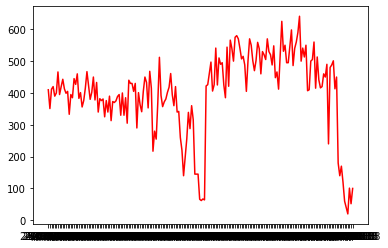

In [15]:
### PLOTA A CURVA TOTAL PARA ANÁLISE DOS DADOS ###

Y = pd.read_excel('database_tcc.xlsx')[["jantar"]]
X_dates = pd.read_excel('database_tcc.xlsx')[["data"]].values.ravel()

plt.plot(X_dates, Y, lw=1.5, color="red", label="original")
plt.grid(True)

In [30]:
### normalizando todos os dataframes ###

#poderia ser standardizados tbm
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0,10))
scaler_X_test = MinMaxScaler(feature_range=(0,10))
scaler_y_test = MinMaxScaler(feature_range=(0,10))

c_names_X = X_train.columns
c_names_y = y_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=c_names_X)

scaler = MinMaxScaler(feature_range=(0,10))

y_train = scaler.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns=c_names_y)

X_test = scaler_X_test.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=c_names_X)

y_test = scaler_y_test.fit_transform(y_test)
y_test = pd.DataFrame(y_test, columns=c_names_y)

In [32]:
#########################################################################################################
################          APLICACAO DO GRIDSEARCH        OPCIONAL               #########################
#########################################################################################################

######################## GERA O RANGE DE VALORES PARA O GRIDSEARCH ######################################
c_values = []
enum_c = 1
for c in range(1, 1000, enum_c):
    if enum_c < 2500:
        enum_c = enum_c + c * 2
        c_values.append(enum_c)

#print (c_values)
epsilon_values = []
enum_e = 0.0001953125
for e in np.arange(0.0001953125,0.4,0.0001879):
    if enum_e < 0.5:
        enum_e = enum_e + e * 2
        epsilon_values.append(enum_e)

print (epsilon_values)
#########################################################################################################

param_rbf = {'kernel' : ['rbf'], 'C' : c_values, 'epsilon' : epsilon_values, 'gamma' : ['auto']}
param_lin = {'kernel' : ['linear'], 'C' : c_values, 'epsilon' : epsilon_values, 'gamma' : ['auto']}
param_poly = {'kernel' : ['poly'], 'C' : c_values, 'epsilon' : epsilon_values, 'coef0' : [0, 0.01,0.1,0.5, 1], 'degree' : [3, 4, 5, 6]}
param_sig = {'kernel' : ['sigmoid'], 'C' : c_values, 'epsilon' : epsilon_values, 'gamma' : ['auto','scale'], 'coef0' : [0, 0.01,0.1,0.5, 1]}

modelsvr = SVR()

metricas = ['r2', 'explained_variance']

kf= KFold(n_splits = 2, shuffle = True, random_state = 42)

grid = GridSearchCV(modelsvr, param_poly, scoring=metricas, n_jobs=2, refit='r2', return_train_score=False, verbose = 0, cv=kf)

grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_)

#pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_r2', axis=0, ascending=False)[['params','param_epsilon','mean_test_r2','split0_test_r2','split1_test_r2','split2_test_r2','split3_test_r2','split4_test_r2']]
pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_r2', axis=0, ascending=False)[['params','param_epsilon','mean_test_r2','split0_test_r2','split1_test_r2']]

[0.0005859375000000001, 0.0013523625000000001, 0.0024945875, 0.0040126125, 0.0059064375, 0.008176062500000001, 0.010821487500000001, 0.013842712500000002, 0.0172397375, 0.0210125625, 0.0251611875, 0.0296856125, 0.0345858375, 0.039861862500000005, 0.045513687500000004, 0.051541312500000006, 0.05794473750000001, 0.06472396250000001, 0.0718789875, 0.07940981250000001, 0.08731643750000001, 0.0955988625, 0.10425708750000001, 0.11329111250000001, 0.12270093750000001, 0.13248656250000002, 0.14264798750000002, 0.15318521250000003, 0.16409823750000002, 0.17538706250000002, 0.18705168750000004, 0.19909211250000003, 0.21150833750000003, 0.22430036250000004, 0.23746818750000004, 0.25101181250000004, 0.2649312375, 0.27922646250000005, 0.29389748750000005, 0.30894431250000004, 0.32436693750000006, 0.34016536250000007, 0.35633958750000005, 0.3728896125000001, 0.3898154375000001, 0.40711706250000007, 0.4247944875000001, 0.4428477125000001, 0.4612767375000001, 0.4800815625000001, 0.4992621875000001, 0.

KeyboardInterrupt: 

R^2 score: -0.015854748862253132
erro absoluto médio: 87.50475623849616
erro quadrático médio:: 14415.826604480288
erro absoluto mediano: 52.48779994581457
erro máximo: 305.3565964760641
erro absoluto médio excedente: 107.92449295447703
erro absoluto médio de falta: 76.88649314618611
erro absoluto mediano excedente: 52.49481612290202
erro absoluto mediano de falta: 52.48078376872712
erro máximo pra mais: 305.3565964760641
erro máximo pra menos: 224.07466526601843


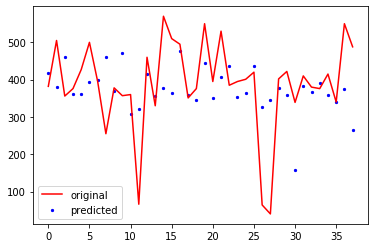

In [28]:
#########################################################################################################
################                   APLICACAO DO MODELO E RESULTADOS             #########################
#########################################################################################################

#NAO NORMALIZADOS
#svr_poly = SVR(C=20, coef0=1, degree=4, epsilon=4, gamma='scale', kernel='poly')

#NORMALIZADO
#svr_poly = SVR(kernel='rbf', C=0.1, gamma='scale', degree=3, epsilon=2, coef0=0.1)


y_pred = grid.predict(X_test)

#NAO NORMALIZADOS
#y_test_original = y_test


#NORMALIZADO
y_pred = scaler_y_test.inverse_transform(y_pred.reshape(-1,1))
y_test_original = scaler_y_test.inverse_transform(y_test)

y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['jantar']

y_test_original = pd.DataFrame(y_test_original)
y_test_original.columns = ['jantar']

print('R^2 score: {}'.format(r2_score(y_test_original['jantar'],y_pred['jantar'])))
print('erro absoluto médio: {}'.format(mean_absolute_error(y_test_original['jantar'],y_pred['jantar'])))
print('erro quadrático médio:: {}'.format(mean_squared_error(y_test_original['jantar'],y_pred['jantar'])))
print('erro absoluto mediano: {}'.format(median_absolute_error(y_test_original['jantar'],y_pred['jantar'])))
print('erro máximo: {}'.format(max_error(y_test_original['jantar'],y_pred['jantar'])))
print('erro absoluto médio excedente: {}'.format(mean_absolute_error(y_test_original[y_test_original['jantar'] < y_pred['jantar']],y_pred[y_pred['jantar'] > y_test_original['jantar']])))
print('erro absoluto médio de falta: {}'.format(mean_absolute_error(y_test_original[y_test_original['jantar'] > y_pred['jantar']],y_pred[y_pred['jantar'] < y_test_original['jantar']])))
print('erro absoluto mediano excedente: {}'.format(median_absolute_error(y_test_original[y_test_original['jantar'] < y_pred['jantar']],y_pred[y_pred['jantar'] > y_test_original['jantar']])))
print('erro absoluto mediano de falta: {}'.format(median_absolute_error(y_test_original[y_test_original['jantar'] > y_pred['jantar']],y_pred[y_pred['jantar'] < y_test_original['jantar']])))
print('erro máximo pra mais: {}'.format(max_error(y_test_original[y_test_original['jantar'] < y_pred['jantar']],y_pred[y_pred['jantar'] > y_test_original['jantar']])))
print('erro máximo pra menos: {}'.format(max_error(y_test_original[y_test_original['jantar'] > y_pred['jantar']],y_pred[y_pred['jantar'] < y_test_original['jantar']])))

x = range(y_pred.size)
plt.scatter(x, y_pred, s=5, color="blue", label="predicted")
plt.plot(x, y_test_original, lw=1.5, color="red", label="original")
plt.legend()
plt.show()

In [22]:
### PERMUTATION FEATURE IMPORTANCE ###

teste = svr_poly.fit(X_train, y_train)
r = permutation_importance(teste, X_test, y_test, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:
        print(f"{X_test.columns[i]:<15}"
            '      'f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

NameError: name 'svr_poly' is not defined